Write your own function called ‘polynomial_sframe’ (or otherwise) which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame (e.g. SFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [1]:
import pandas as pd
import numpy as np
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
        
    return poly_dataframe


For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales SFrame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’.

In [4]:
poly1_data = sales['sqft_living']

Add sales[‘price’] to poly1_data as this will be our output variable. e.g.

In [5]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

Use graphlab.linear_regression.create (or another linear regression library) to compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope. 

In [6]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [7]:
model1 = LinearRegression()
model1.fit(poly1_data['power_1'].reshape(len(poly1_data['power_1']),1), poly1_data['price'].reshape(len(poly1_data['price']),1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
print model1.intercept_, model1.coef_

[-43580.74309448] [[ 280.6235679]]


Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model. e.g. with matplotlib and SFrames:

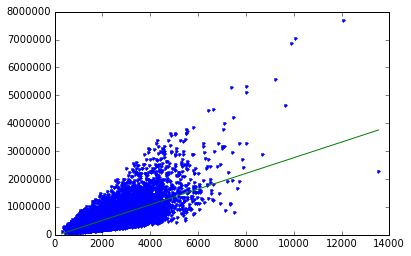

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'].reshape(len(poly1_data['power_1']),1),poly1_data['price'].reshape(len(poly1_data['price']),1),'.',
poly1_data['power_1'].reshape(len(poly1_data['power_1']),1), model1.predict(poly1_data['power_1'].reshape(len(poly1_data['power_1']),1)),'-')

Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect

In [10]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
my_features = poly2_data.columns

In [11]:
poly2_data['price'] = sales['price']

In [12]:
model2 = LinearRegression()
model2.fit(poly2_data[my_features], poly2_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print model2.intercept_, model2.coef_

199222.279305 [  6.79940947e+01   3.85812609e-02]


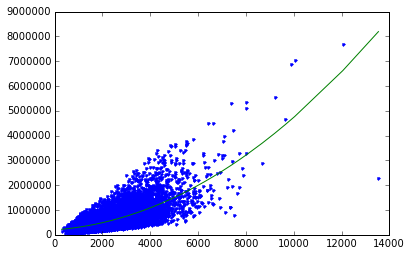

In [14]:
%matplotlib inline
plt.plot(poly2_data['power_1'].reshape(len(poly2_data['power_1']),1),poly2_data['price'].reshape(len(poly2_data['price']),1),'.',
poly2_data['power_1'].reshape(len(poly2_data['power_1']),1), model2.predict(poly2_data[my_features]),'-')

try 15th degree

In [15]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)

In [16]:
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290,84100,24389000,7072810000,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370,136900,50653000,18741610000,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380,144400,54872000,20851360000,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384,147456,56623104,21743271936,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390,152100,59319000,23134410000,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


In [17]:
my_features = poly15_data.columns

In [18]:
poly15_data['price'] = sales['price']

In [19]:
model15 = LinearRegression()
model15.fit(poly15_data[my_features], poly15_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print model15.intercept_, model15.coef_

537116.329638 [  4.56404164e-91   1.42712173e-50   7.68159926e-56   5.37872327e-60
   1.04545560e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
   1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53]


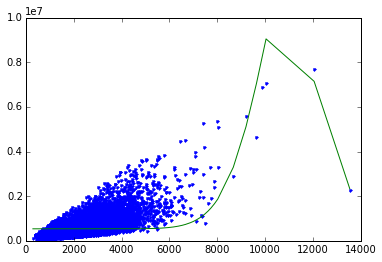

In [21]:
%matplotlib inline
plt.plot(poly15_data['power_1'].reshape(len(poly15_data['power_1']),1),poly15_data['price'].reshape(len(poly15_data['price']),1),'.',
poly15_data['power_1'].reshape(len(poly15_data['power_1']),1), model15.predict(poly15_data[my_features]),'-')

Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

In [22]:
def plot_15degree(set):
    poly15_data = polynomial_dataframe(set['sqft_living'], 15)
    my_features = poly15_data.columns
    poly15_data['price'] = set['price']
    model15 = LinearRegression()
    model15.fit(poly15_data[my_features], poly15_data['price'])
    print model15.intercept_, model15.coef_ #use print vs. return since return can only apply to function
    plt.plot(poly15_data['power_1'].reshape(len(poly15_data['power_1']),1),poly15_data['price'].reshape(len(poly15_data['price']),1),'.',
             poly15_data['power_1'].reshape(len(poly15_data['power_1']),1), model15.predict(poly15_data[my_features]),'-')

In [23]:
set1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

274654.416839 [  1.76309322e-05   4.45209565e-02   4.14184801e-06  -4.48299021e-10
  -2.26644545e-14   1.06410506e-16  -7.16384897e-16   2.94462194e-16
  -1.75455816e-16  -1.27725700e-15   1.21016490e-16   5.51015870e-16
   2.01211397e-16  -3.22147875e-16  -3.72316797e-16]


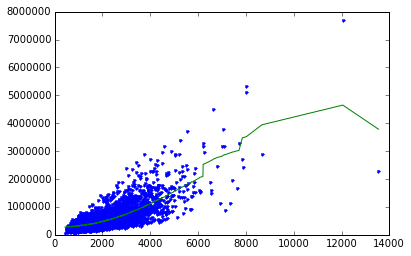

In [24]:
plot_15degree(set1)

255823.035345 [  3.00696173e-05   6.13343008e-02  -2.49646946e-06   1.10857456e-10
  -1.77208810e-14   7.97039963e-16  -3.56019685e-16  -3.01230718e-16
  -6.11363134e-16   3.64507277e-16   7.06924979e-16   7.64851144e-16
   1.03890362e-15  -4.78052606e-16   1.35362916e-15]


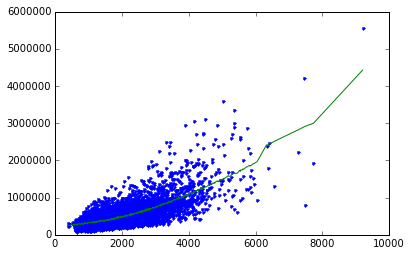

In [25]:
plot_15degree(set2)

252002.143168 [  3.05151126e-05   6.76505534e-02  -5.32626420e-06   4.60005656e-10
  -1.31782167e-14  -1.85903535e-16  -3.63807177e-16   5.76333430e-16
   4.40116376e-16   5.39425255e-16  -2.05761480e-16   1.13209891e-15
   6.20832342e-16   3.32806473e-16  -2.35244804e-16]


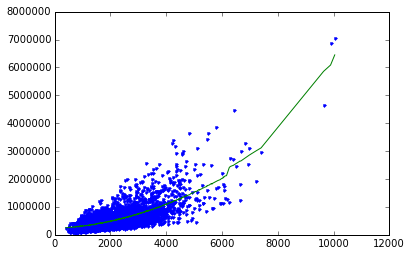

In [26]:
plot_15degree(set3)

269673.483721 [  2.93423692e-05   5.48175325e-02  -1.45794817e-06   7.57359483e-11
   3.46421763e-14  -1.23930208e-15  -3.99670478e-16   9.03673313e-16
  -4.92003619e-16  -5.42701710e-16   2.74000741e-16   3.96425353e-16
   2.99025408e-16  -1.03384865e-15  -3.33304232e-16]


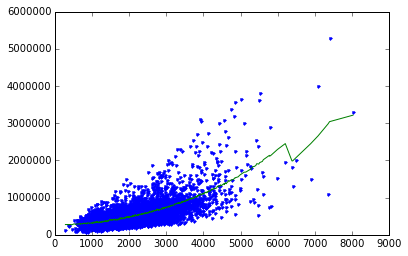

In [27]:
plot_15degree(set4)

Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree. If you’re using SFrames then create a training, validation and testing subsets as follows:

Now for each degree from 1 to 15:

Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
Add training_data[‘price’] as a column to your polynomial data set
Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
Compute the RSS on VALIDATION for the current model (print or save the RSS)

In [53]:
def plot_degree(data1, data2, degree):
    poly_data = polynomial_dataframe(data1['sqft_living'], degree)
    valid_data = polynomial_dataframe(data2['sqft_living'], degree)
    my_features = poly_data.columns
    my_features_valid = valid_data.columns
    poly_data['price'] = data1['price']
    valid_data['price'] = data2['price']
    model = LinearRegression()
    model.fit(poly_data[my_features], poly_data['price'])
    return np.sum((model.predict(valid_data[my_features]) - valid_data['price'])**2) #use print vs. return since return can only apply to function

In [54]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
valid_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [59]:
range_list = []
for i in range(1,16):
    range_list.append((plot_degree(train_data, valid_data, i),i))
min(range_list)


(566268584232998.6, 6)

Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)

In [60]:
plot_degree(train_data, test_data, 6)

135225109698298.17